# Завдання 1


Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія імовірностей. Комбінаторика”. Будемо вважати, що зміна ціни акції у кожний момент часу дорівнює x ~ Γ(0.3, 1.1), де Γ — позначення гамма-розподілу.

Необхідно запустити симуляцію n = 100 разів для різних значень часу t.

а) Побудуй гістограму розподілу x.

б) Запусти симуляцію з t від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.

Примітка: кінцеве значення t взято умовно рівним 60, але це не відіграє великої ролі, головне, щоб воно було достатнім для проходження тесту на нормальність, а значення кроку — дозволяло побачити динаміку зміни розподілу. Конкретні значення не так важливі.

Для кожного значення t побудуй гістограму розподілу ціни та перевір його на нормальність. Зроби висновки про зміну розподілу зі збільшенням t.

Запуск симуляції для t=10


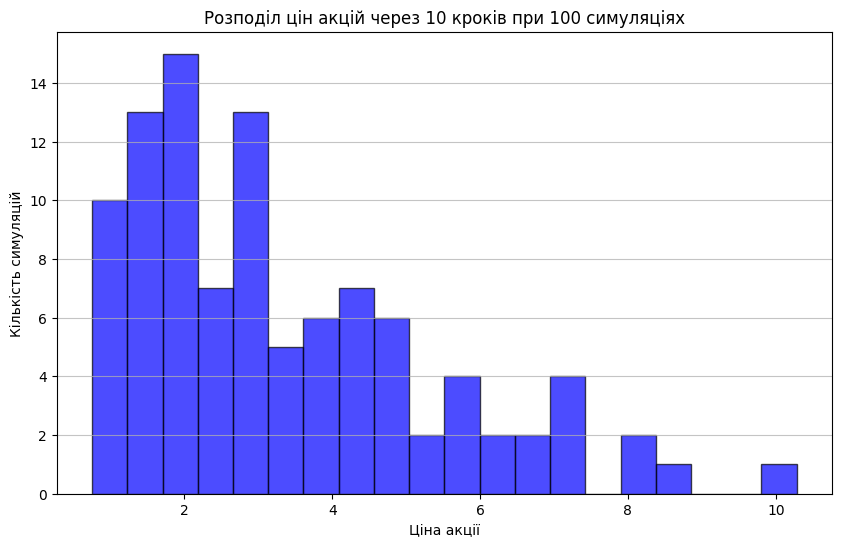

Середня ціна акції через 10 кроків: 3.3512981734452922

Запуск симуляції для t=50


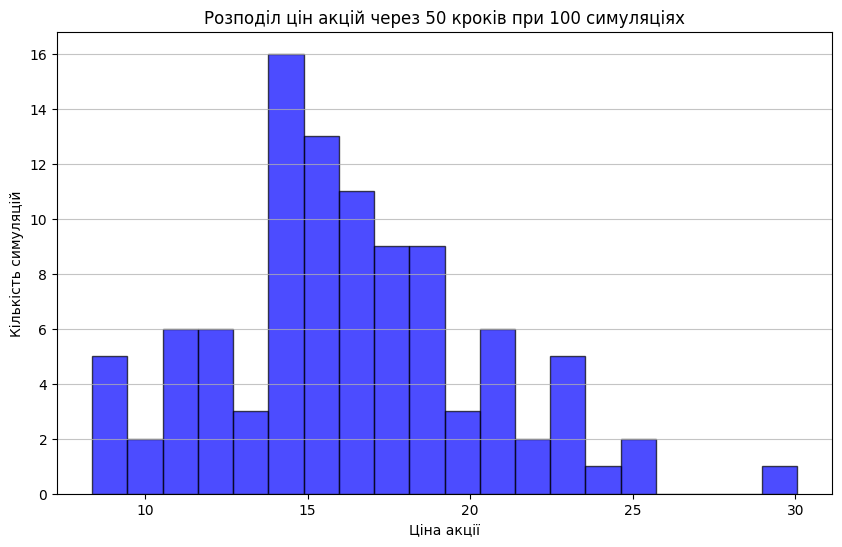

Середня ціна акції через 50 кроків: 16.25798188195905

Запуск симуляції для t=100


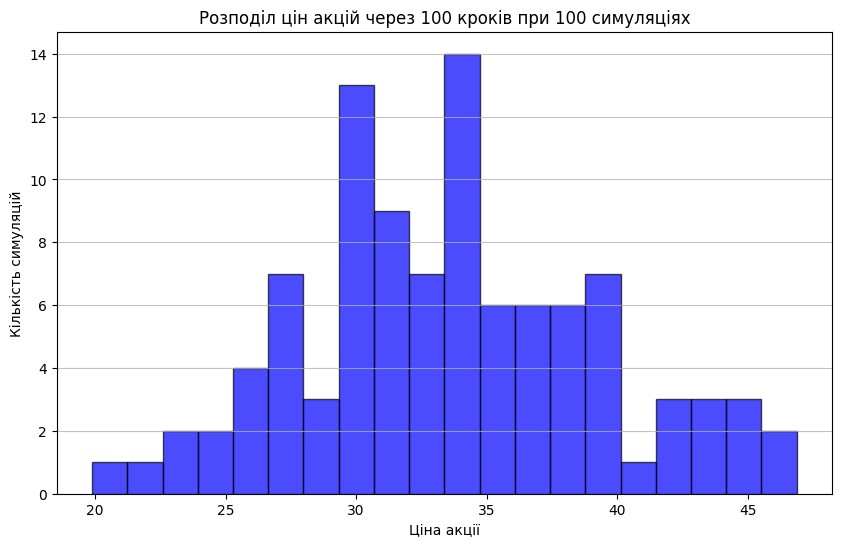

Середня ціна акції через 100 кроків: 33.58093523392331



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stock_price_at_time(t):
    # Початкова ціна
    price = 0
    for _ in range(t):
        # Зміна ціни згідно з гамма-розподілом
        price += np.random.gamma(0.3, 1.1)
    return price

def simulate_n_times(n, t):
    np.random.seed(42)  # Встановлення початкового значення для генератора випадкових чисел для відтворюваності
    prices = [stock_price_at_time(t) for _ in range(n)]
    mean_price = np.mean(prices)

    # Вивід гістограми
    plt.figure(figsize=(10, 6))
    plt.hist(prices, bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Розподіл цін акцій через {t} кроків при {n} симуляціях")
    plt.xlabel("Ціна акції")
    plt.ylabel("Кількість симуляцій")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    return mean_price

# Запуск симуляцій для різних значень t
time_intervals = [10, 50, 100]
mean_prices = []
for t in time_intervals:
    print(f"Запуск симуляції для t={t}")
    mean_price = simulate_n_times(100, t)
    mean_prices.append(mean_price)
    print(f"Середня ціна акції через {t} кроків: {mean_price}\n")


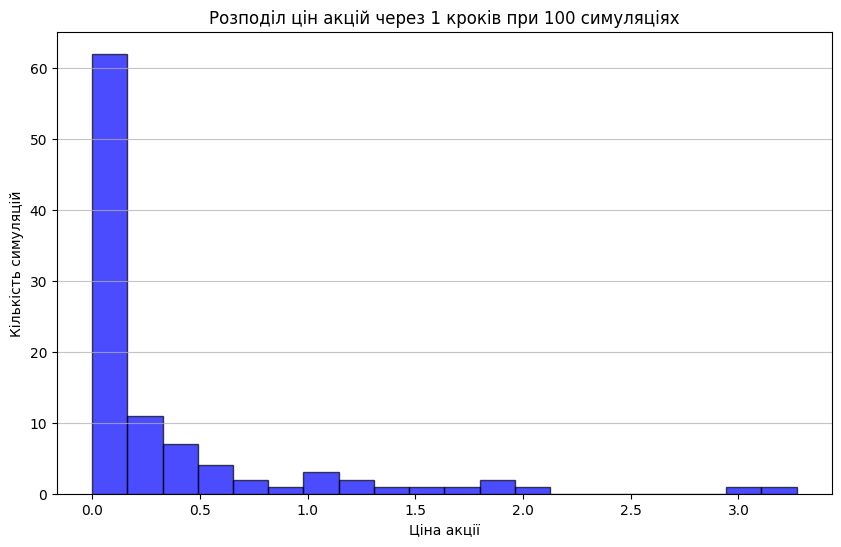

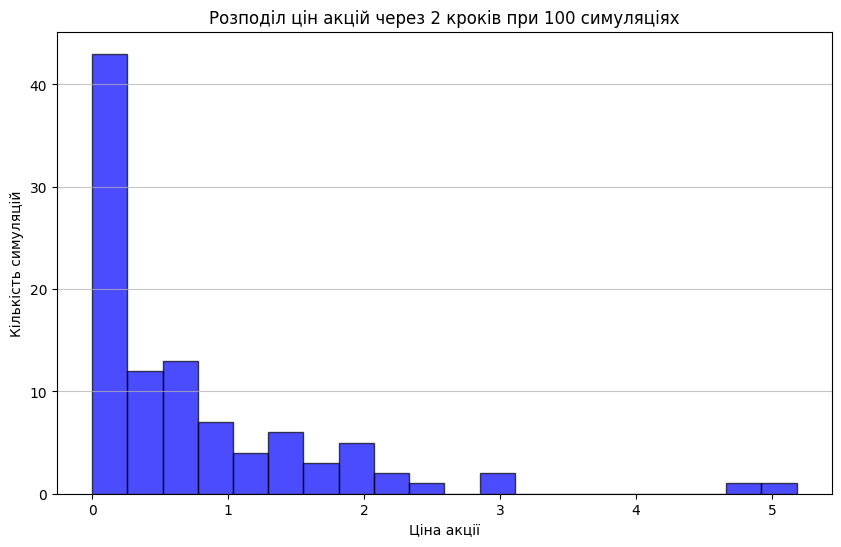

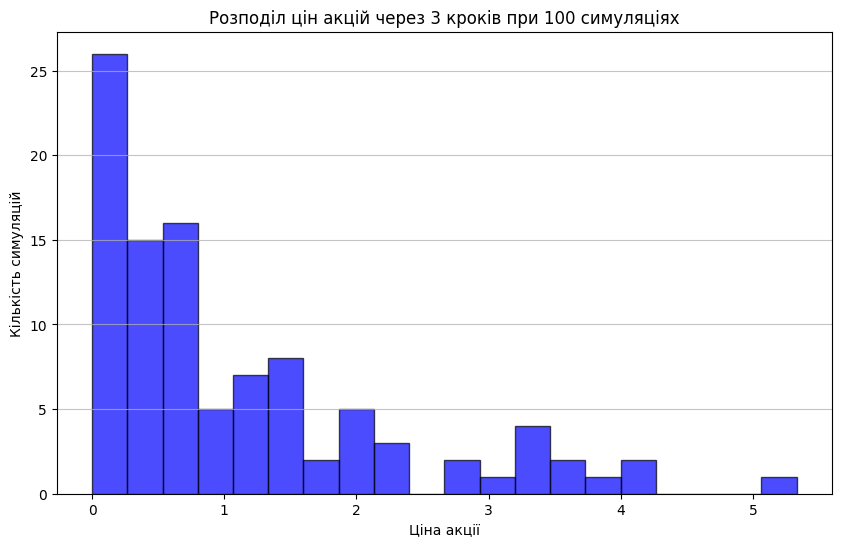

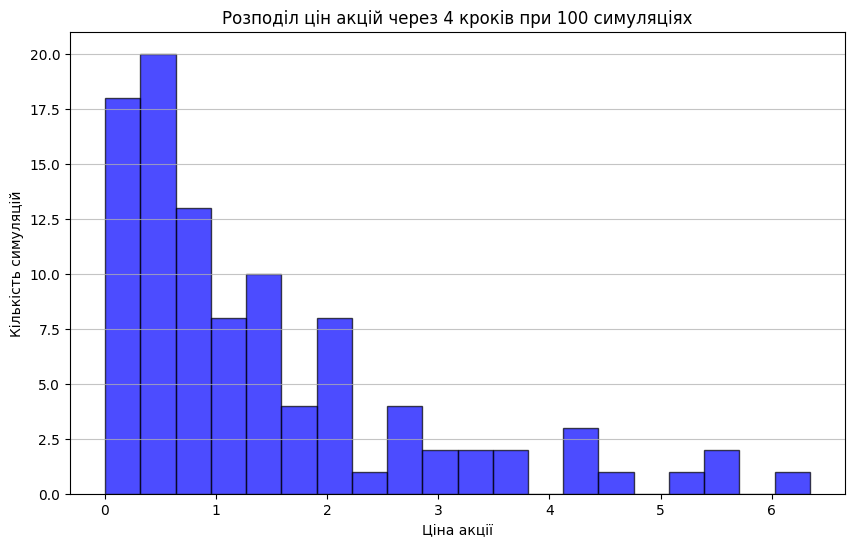

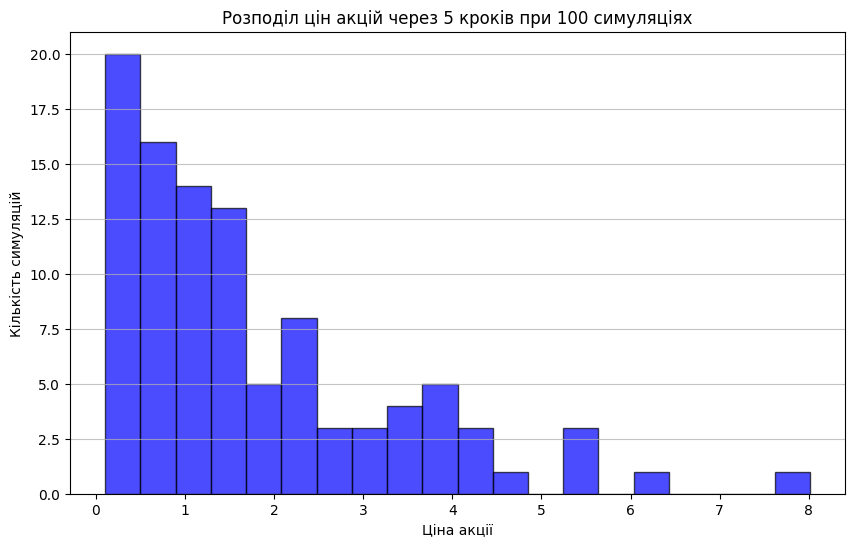

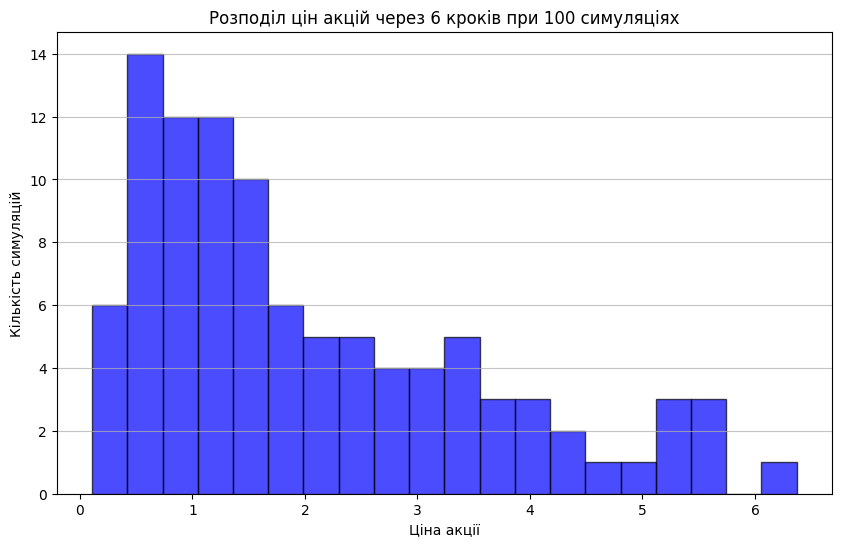

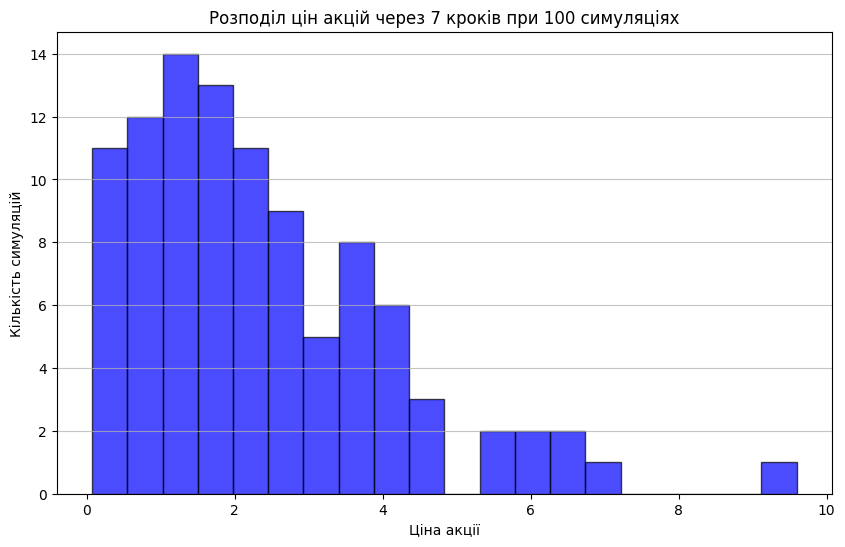

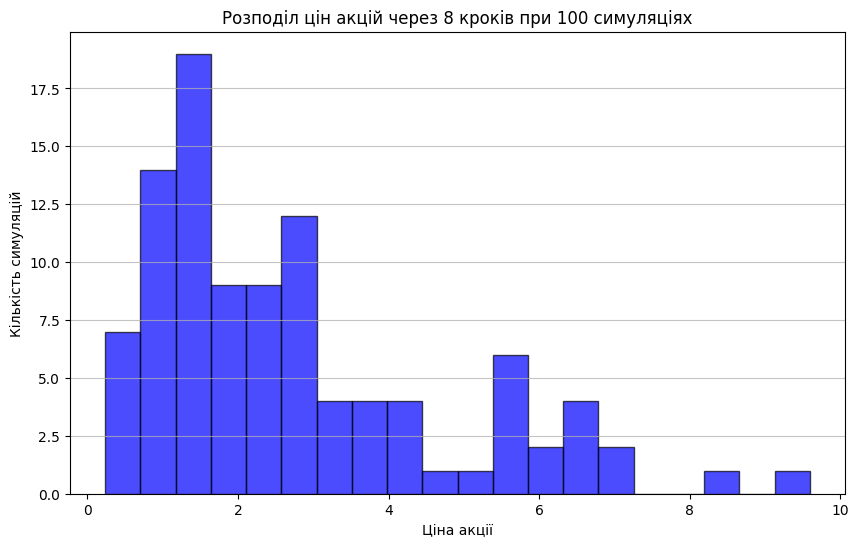

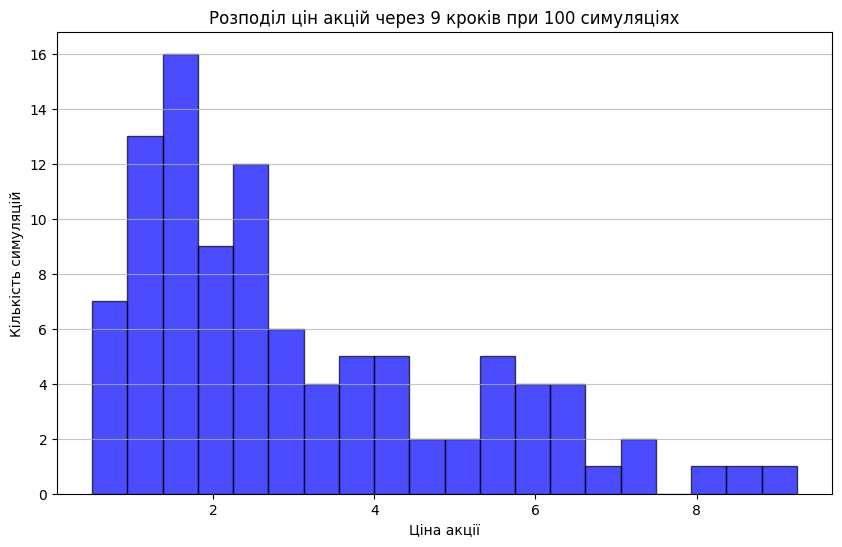

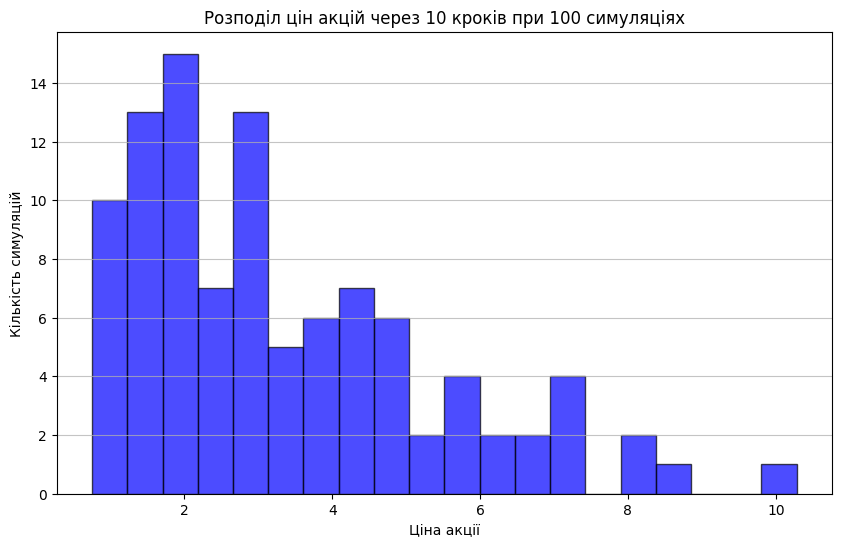

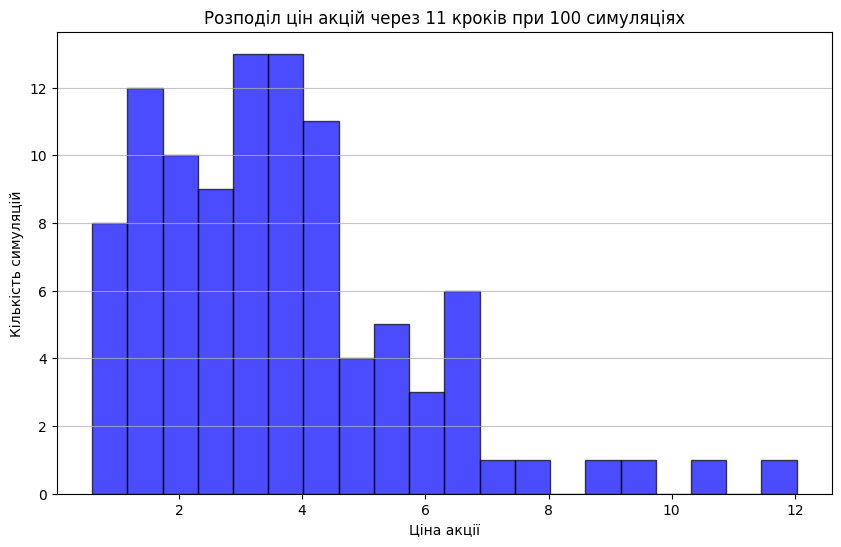

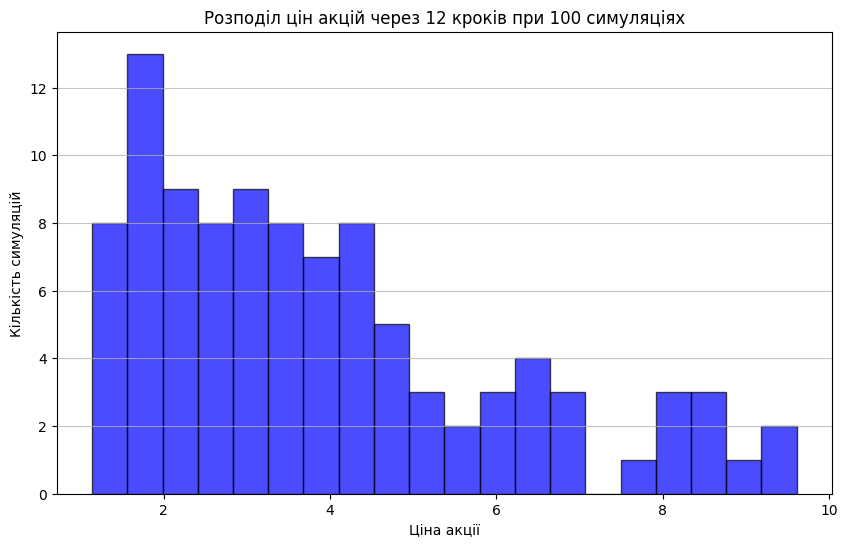

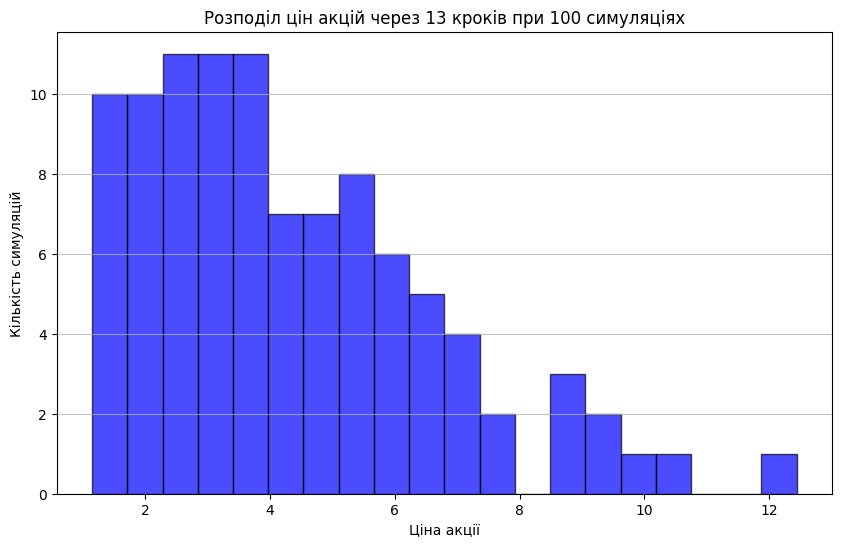

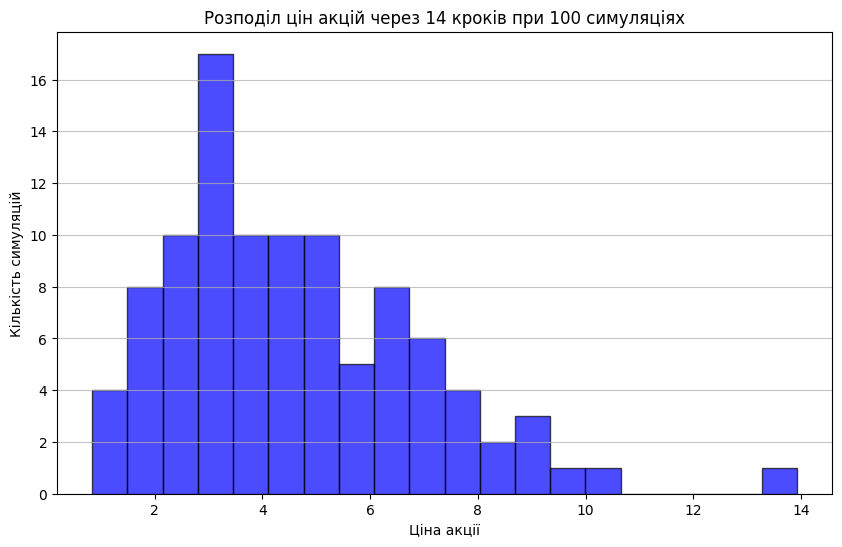

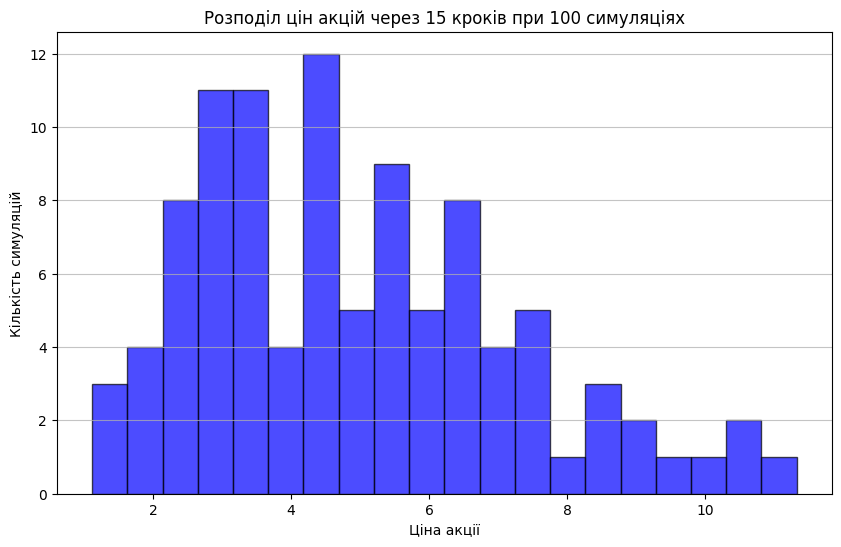

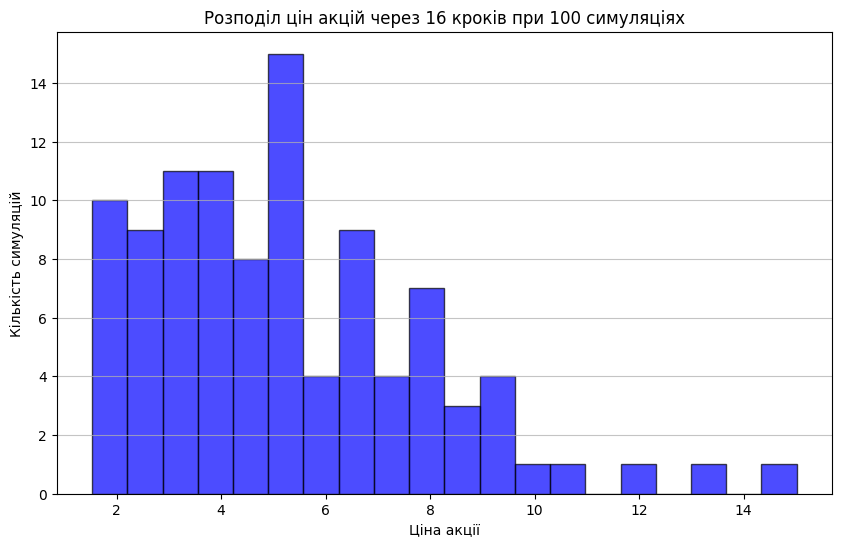

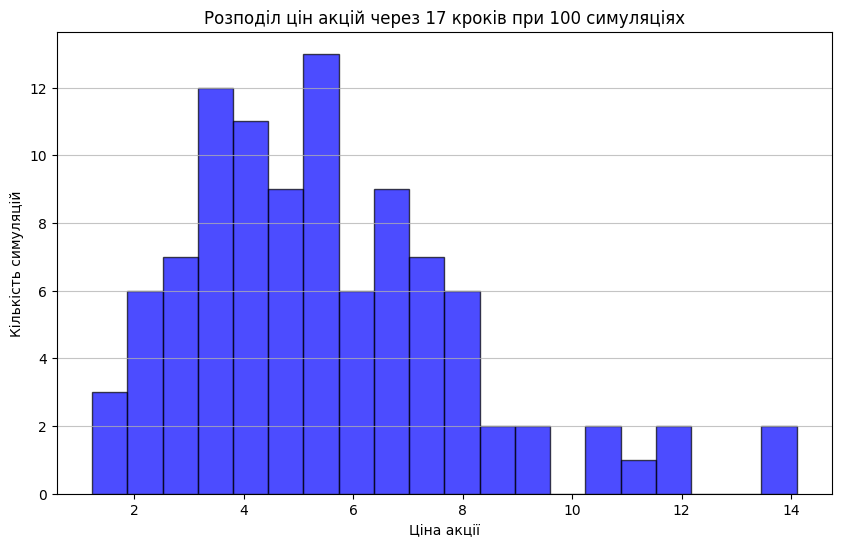

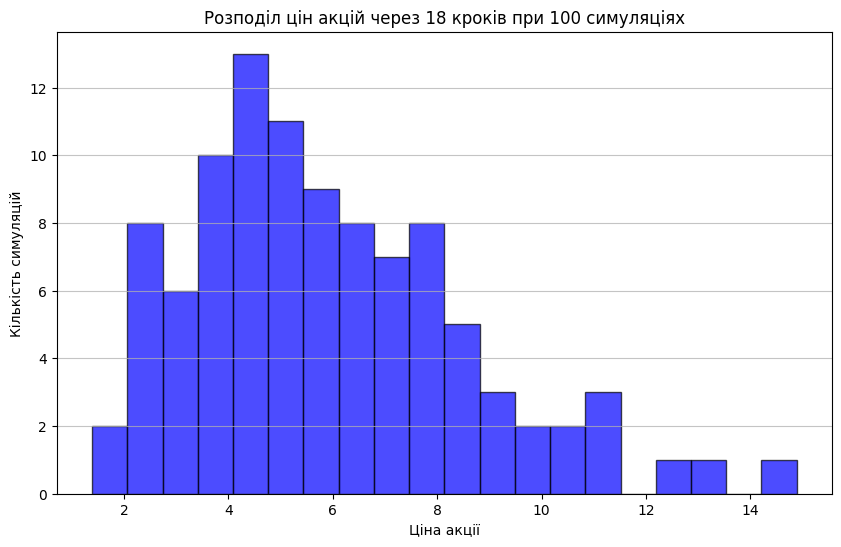

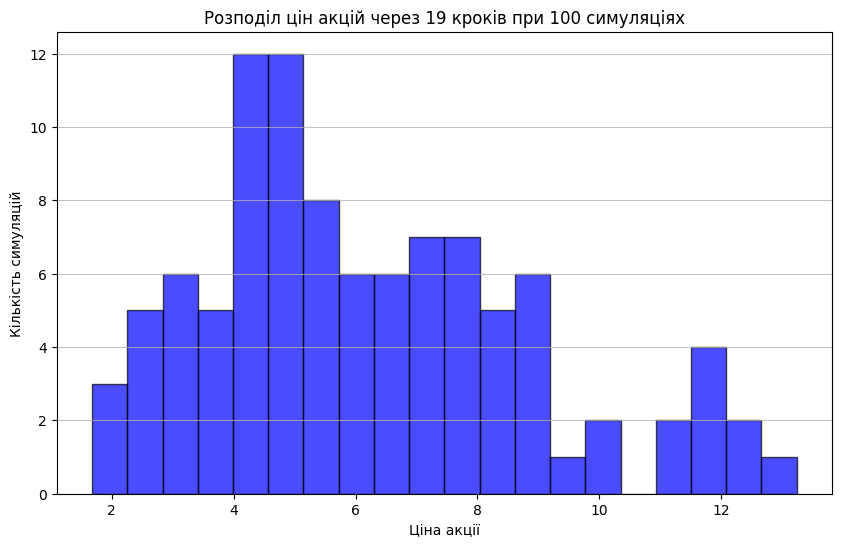

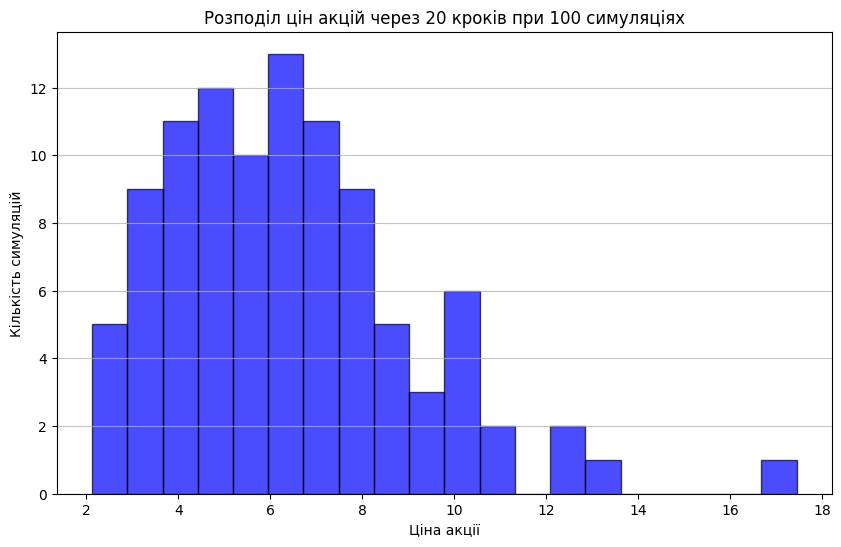

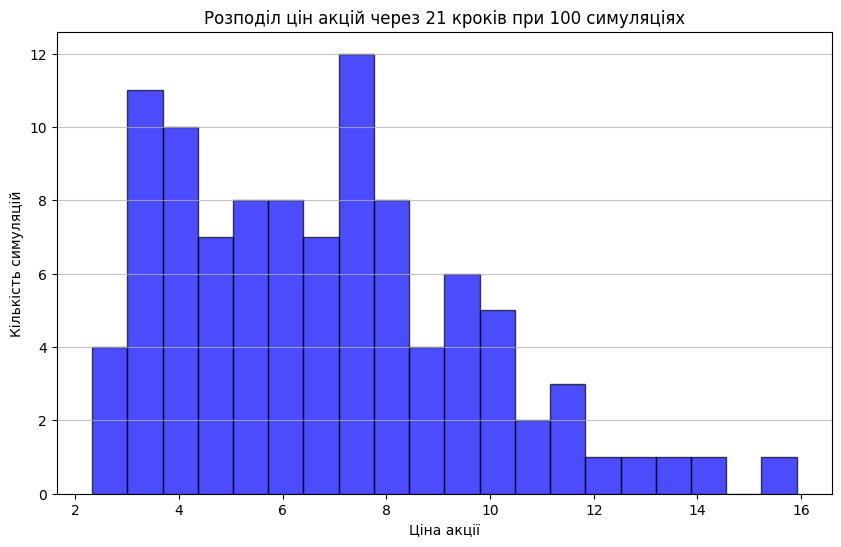

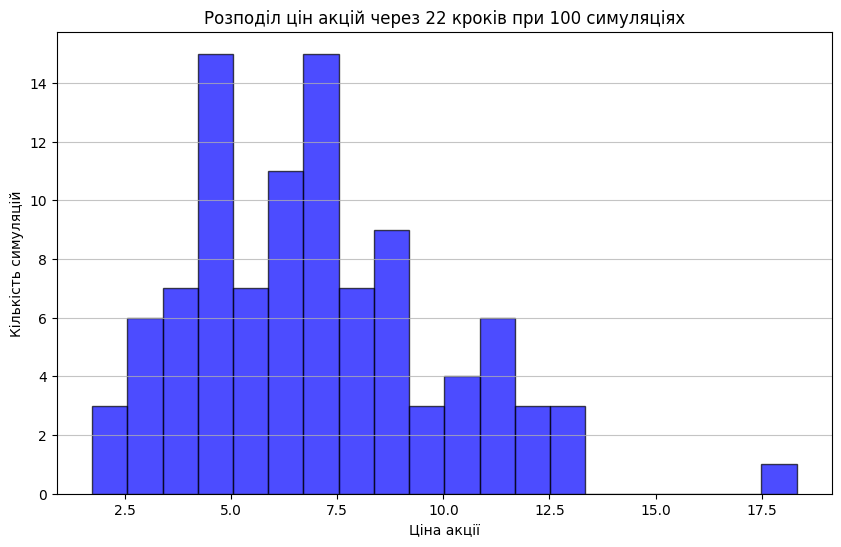

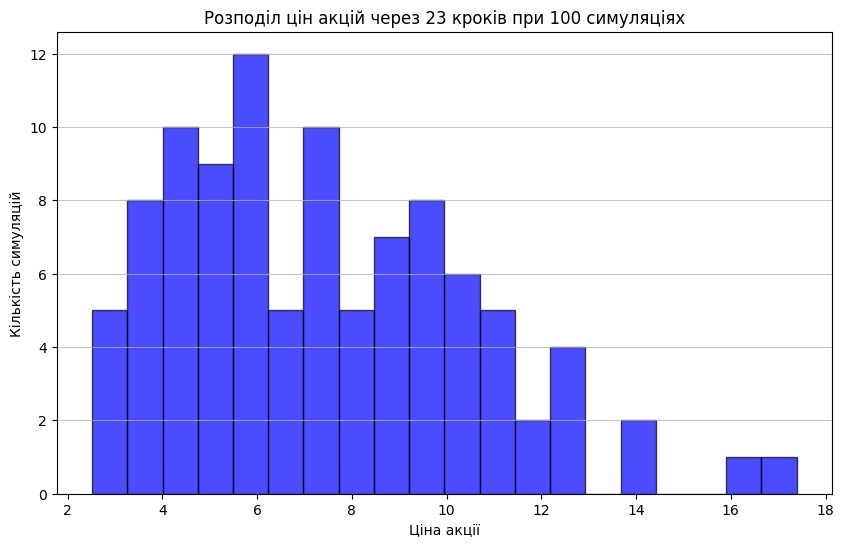

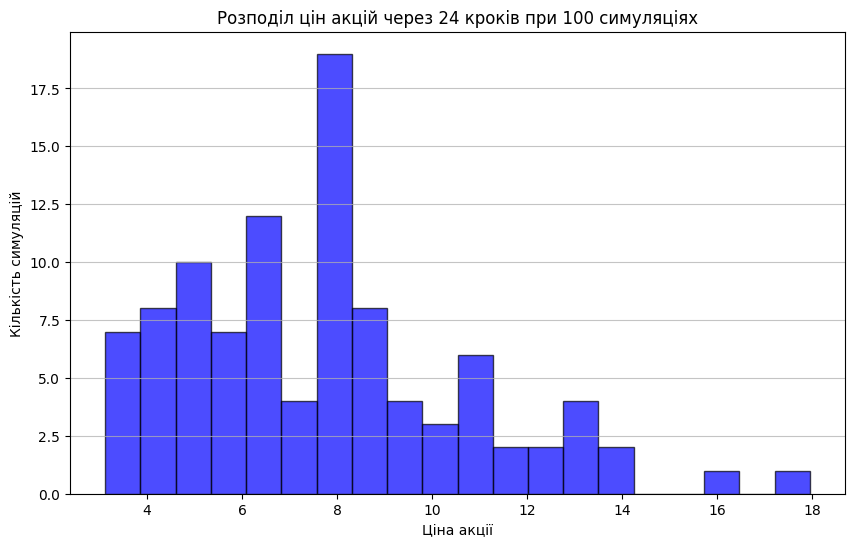

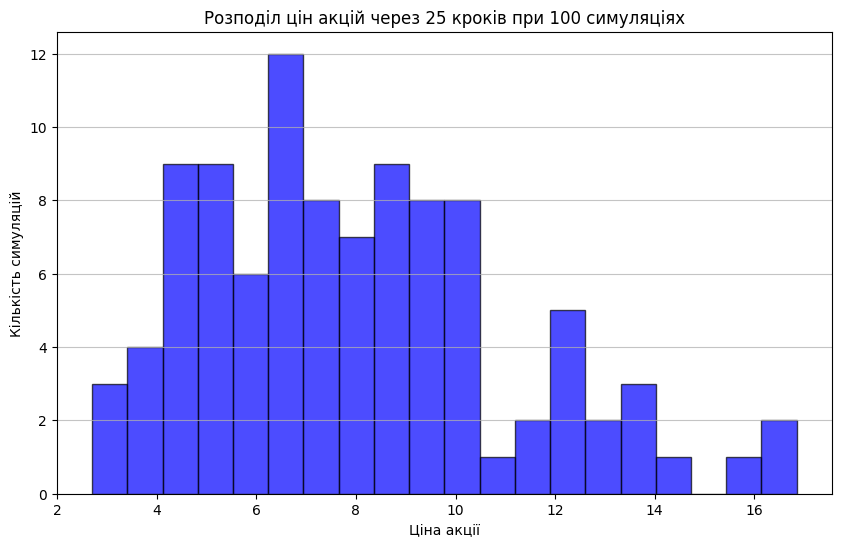

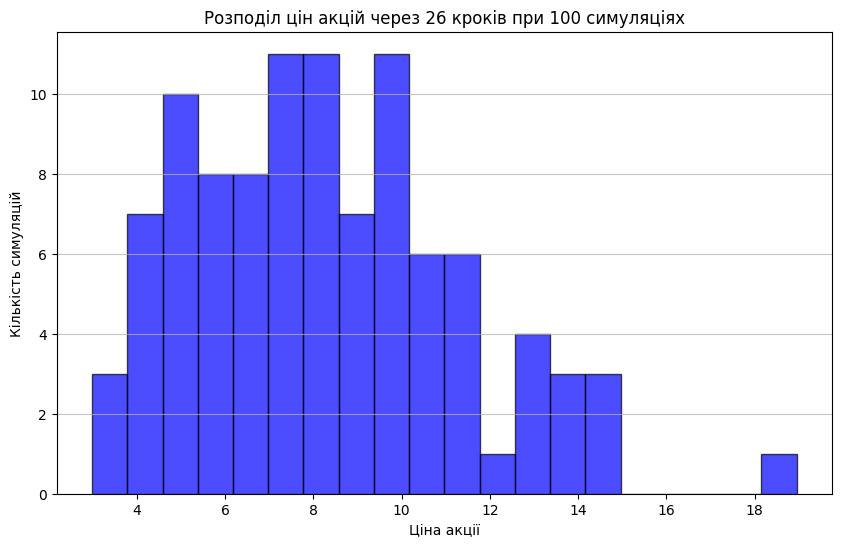

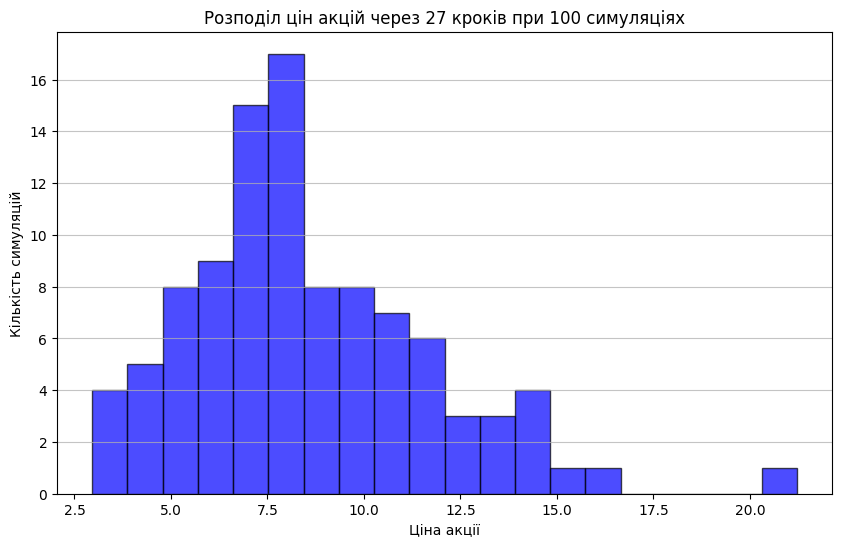

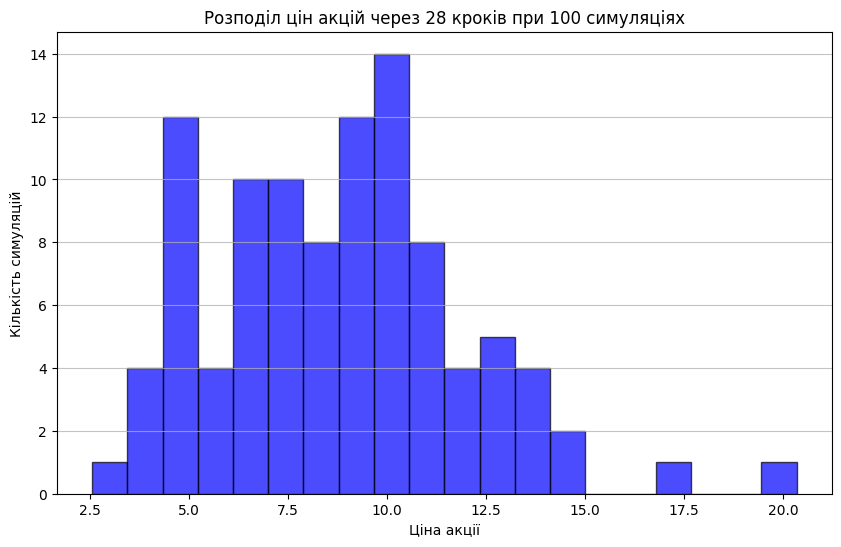

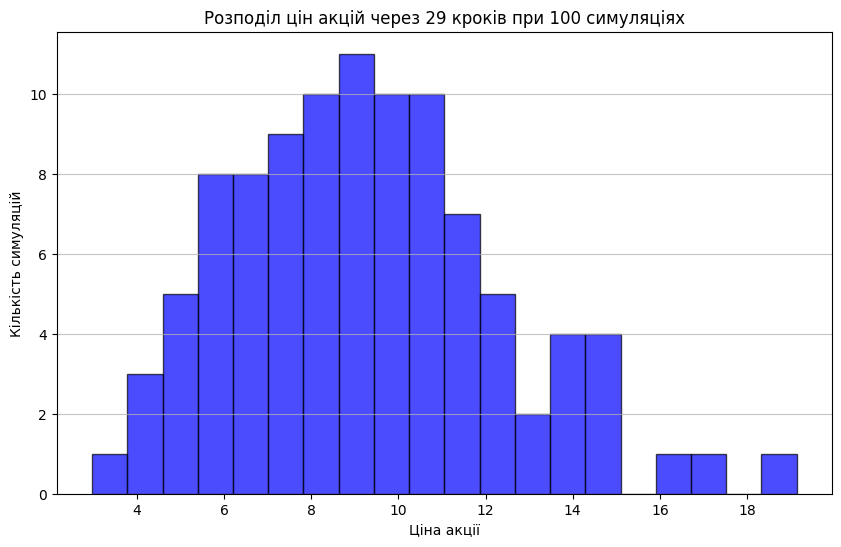

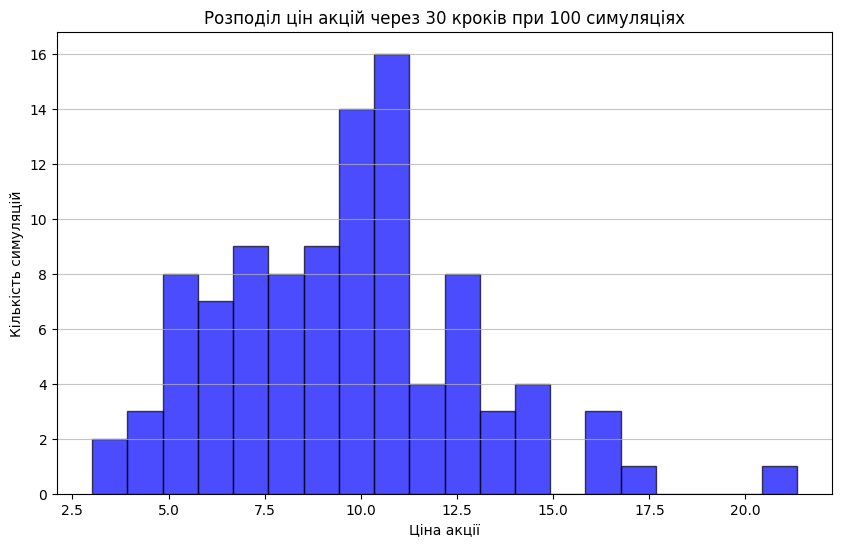

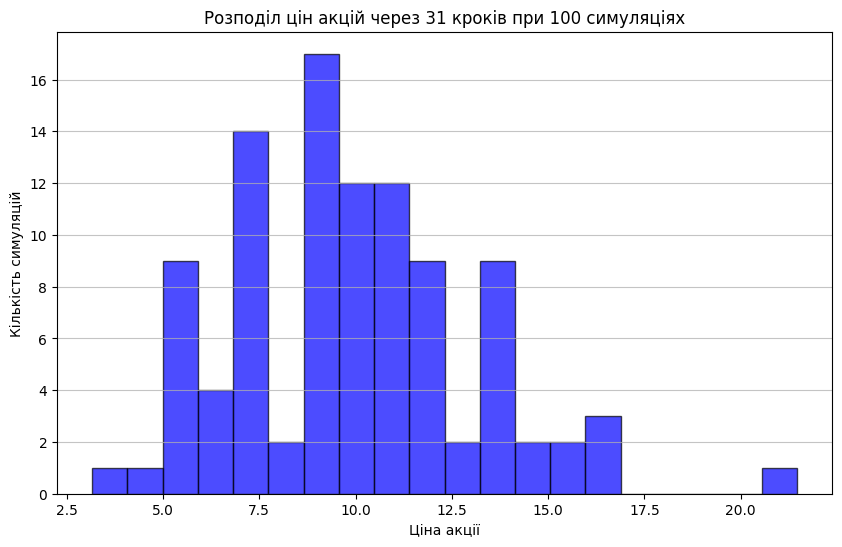

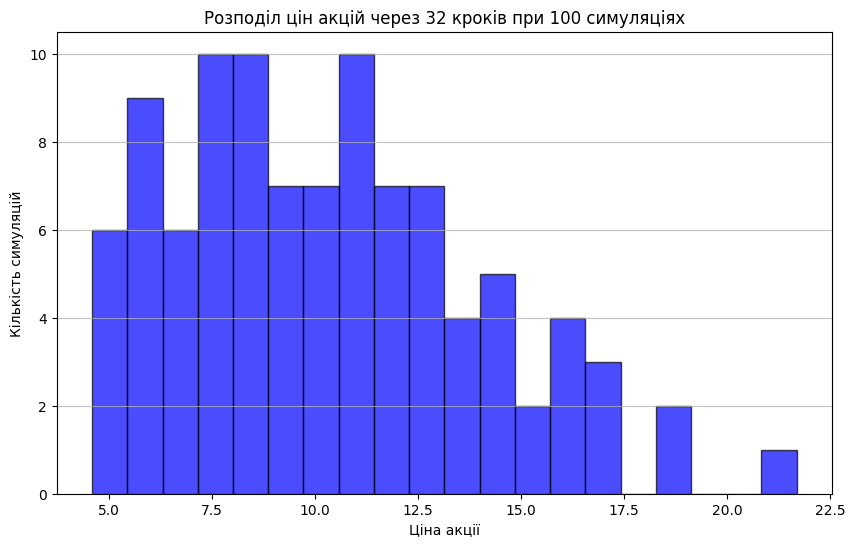

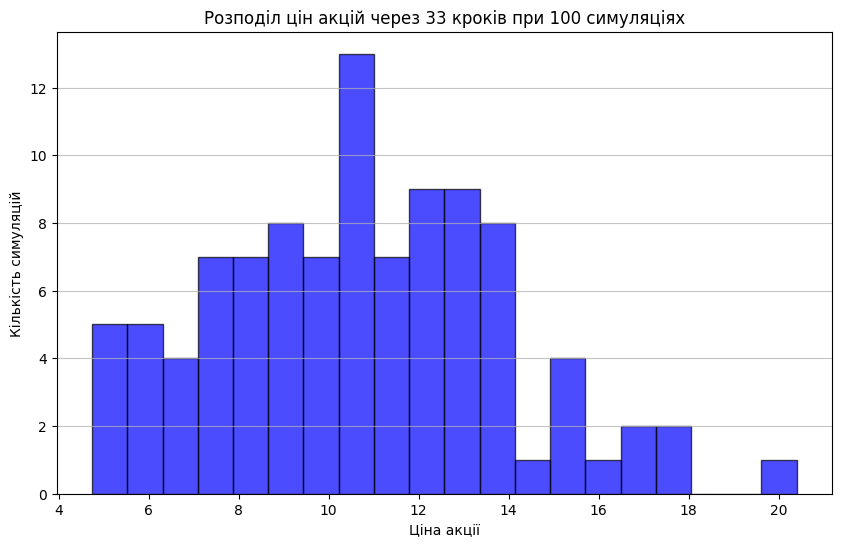

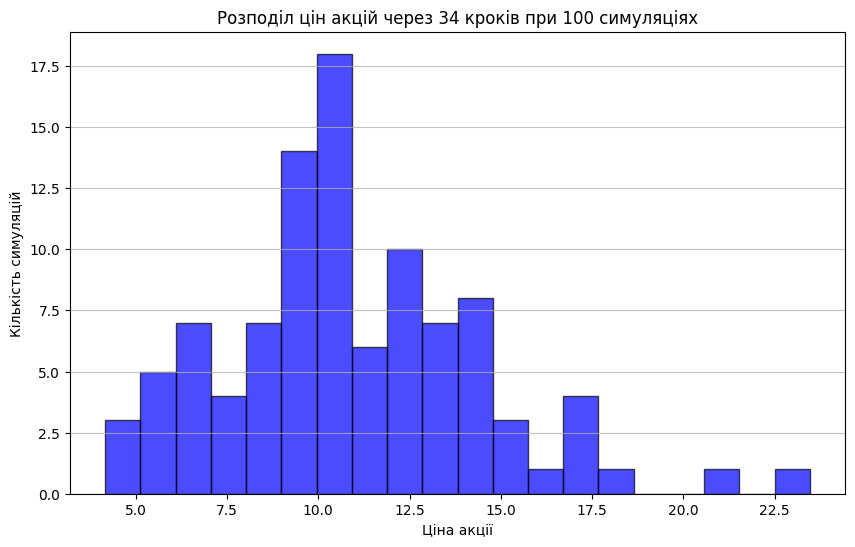

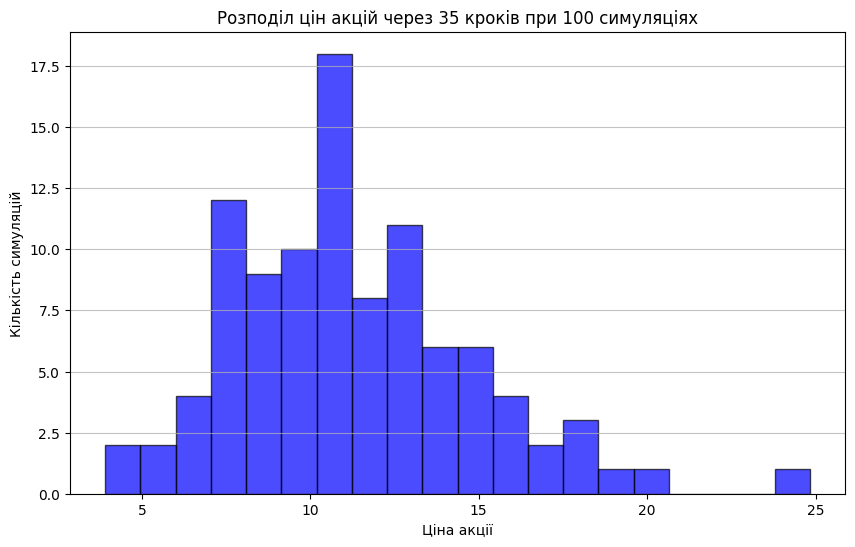

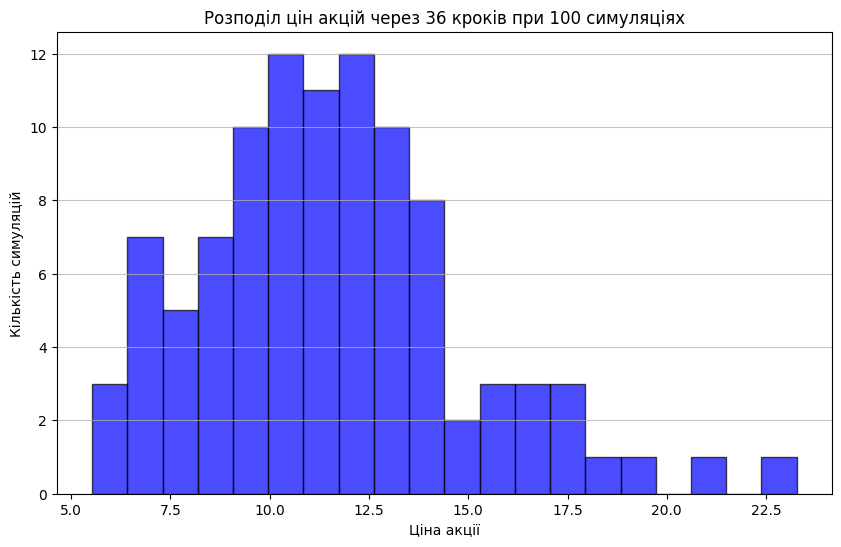

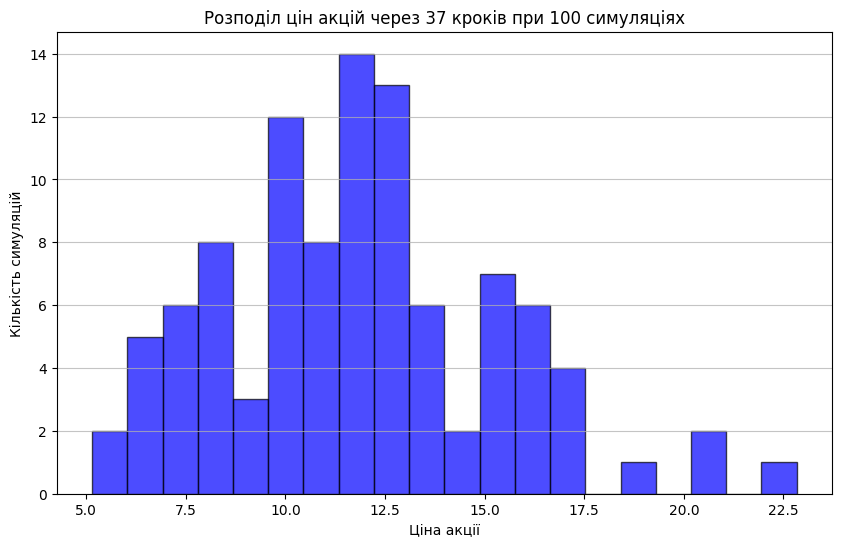

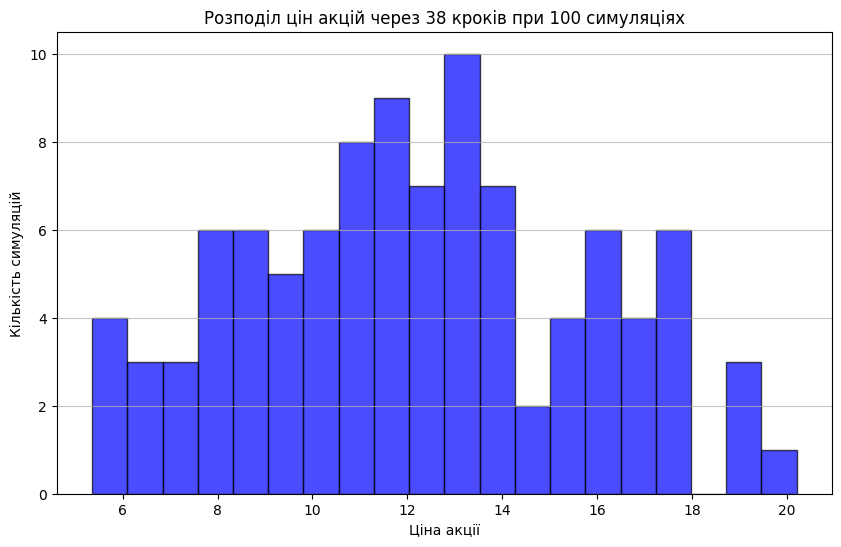

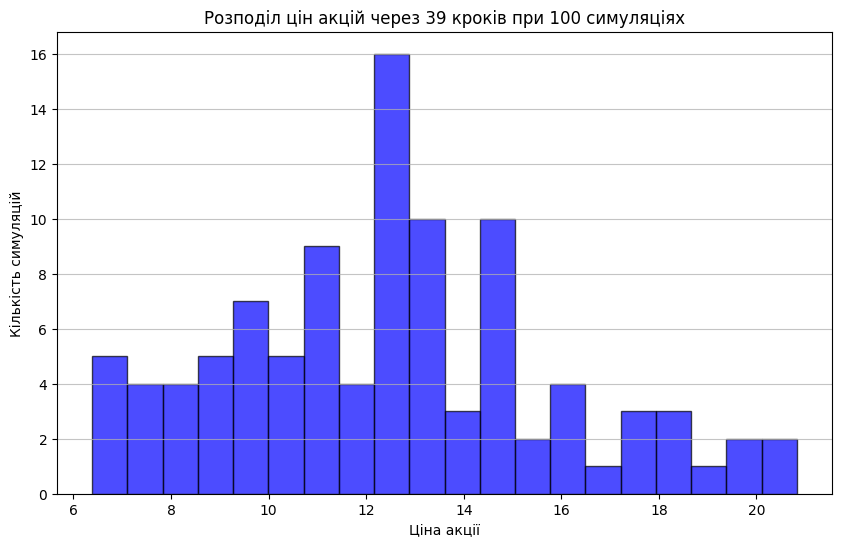

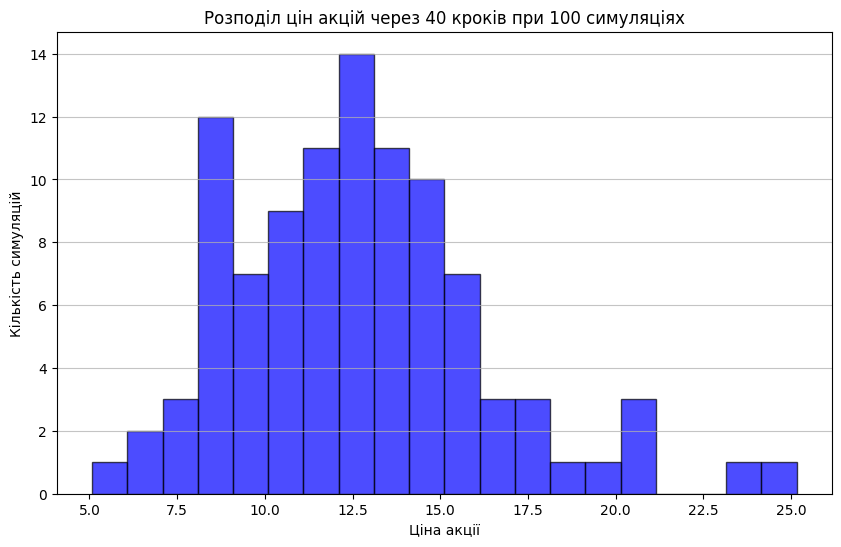

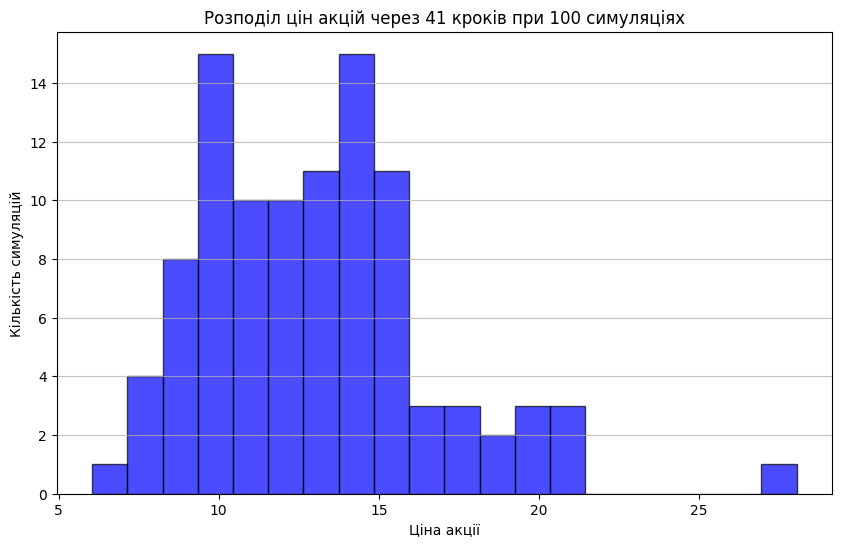

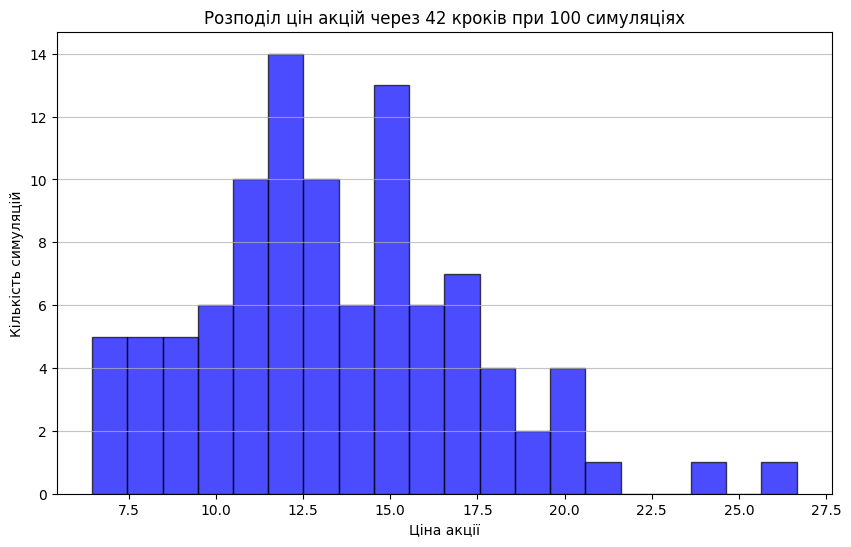

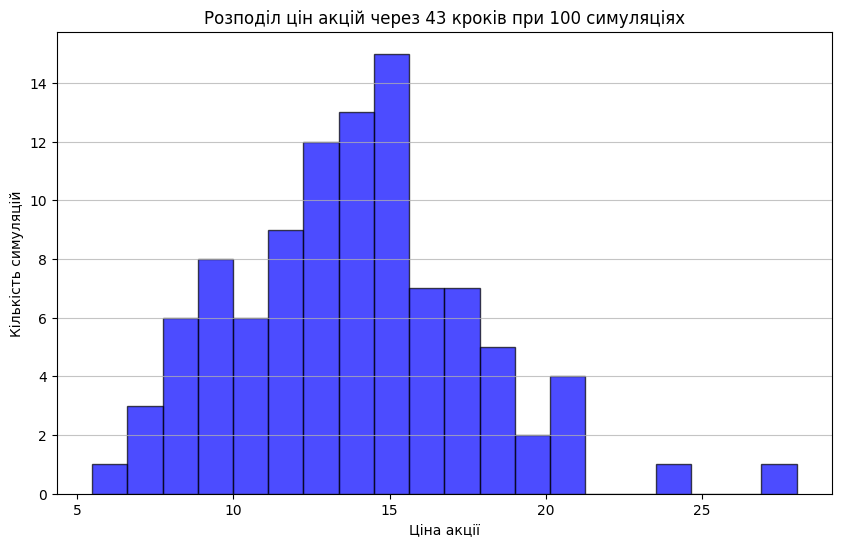

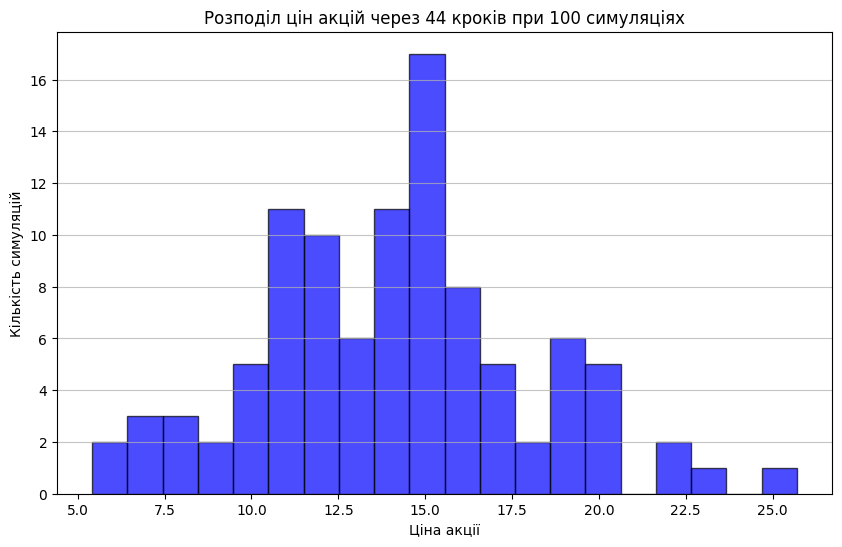

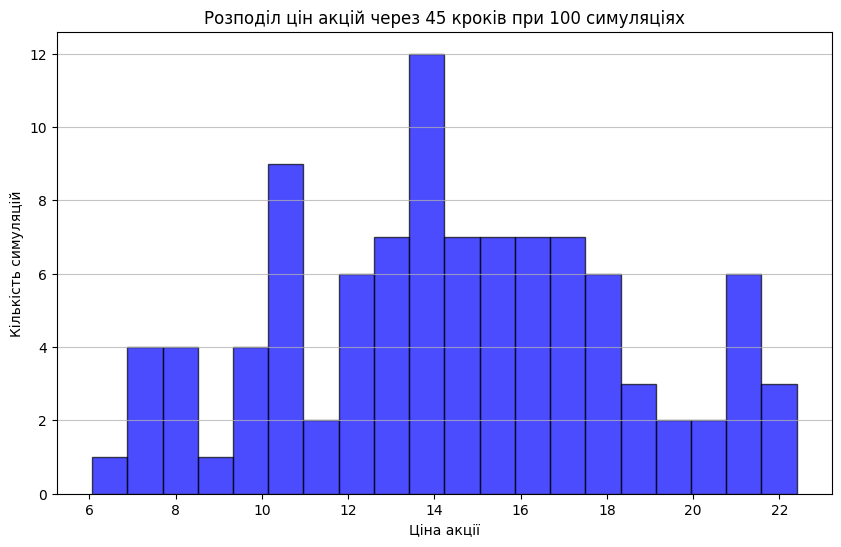

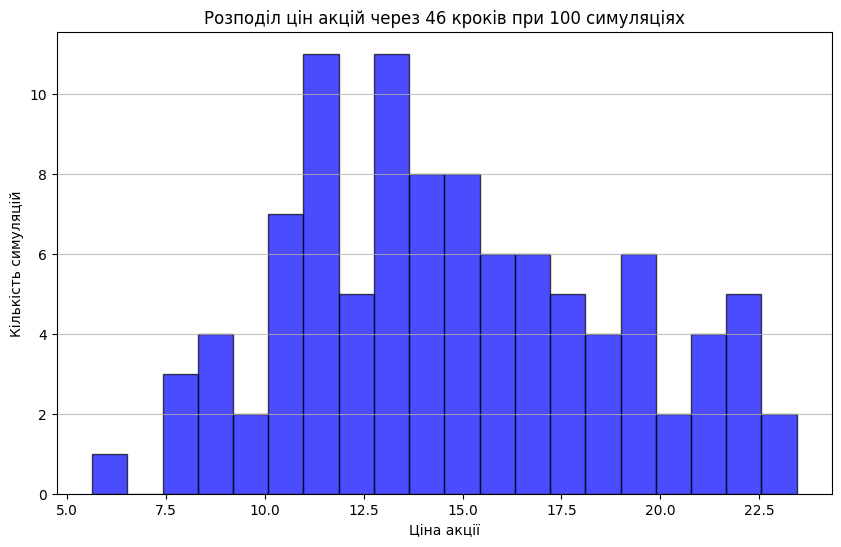

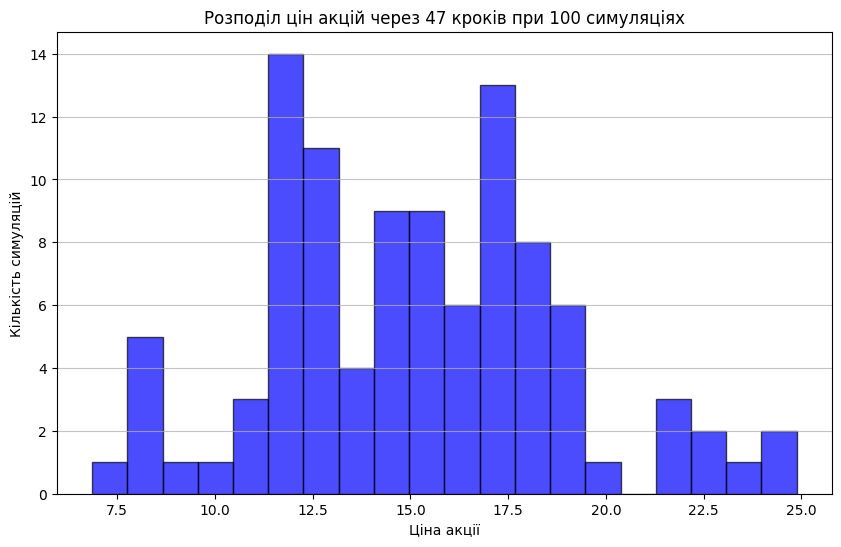

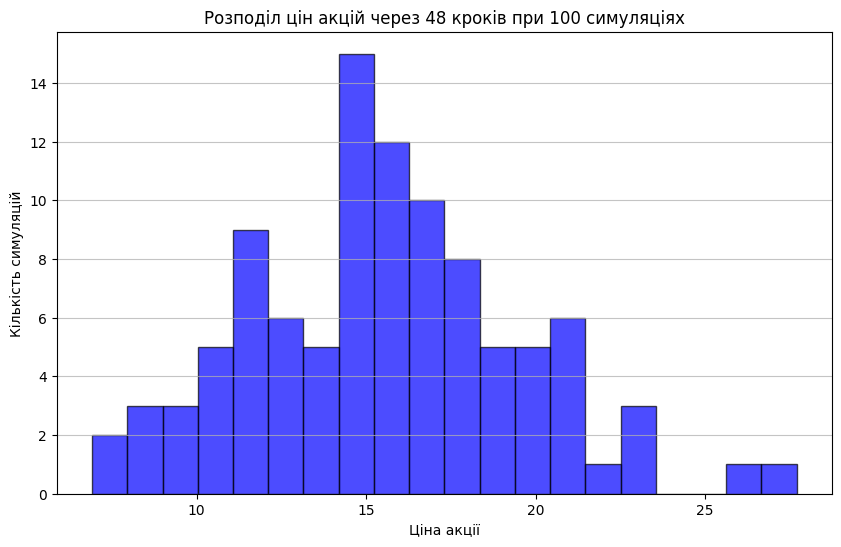

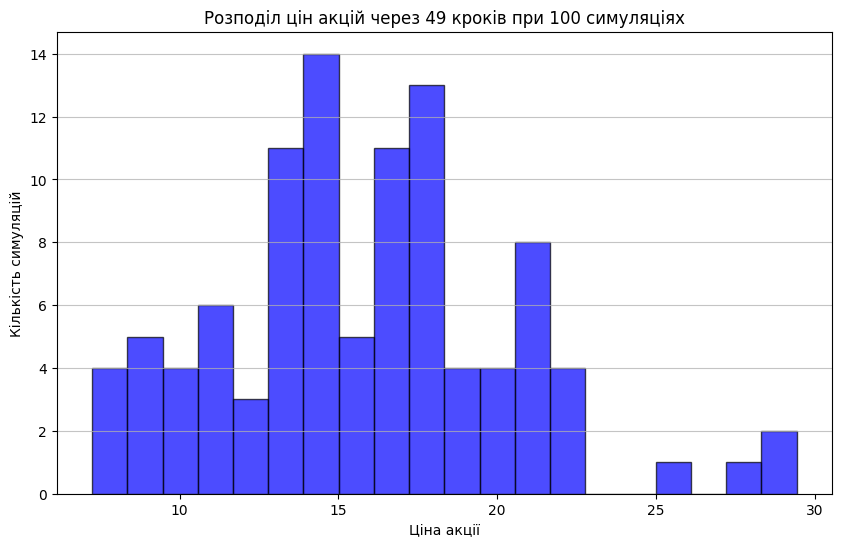

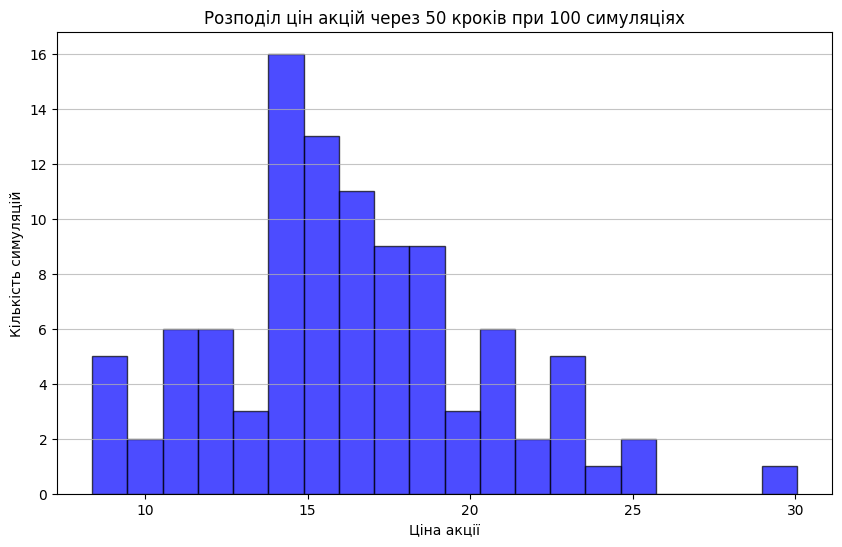

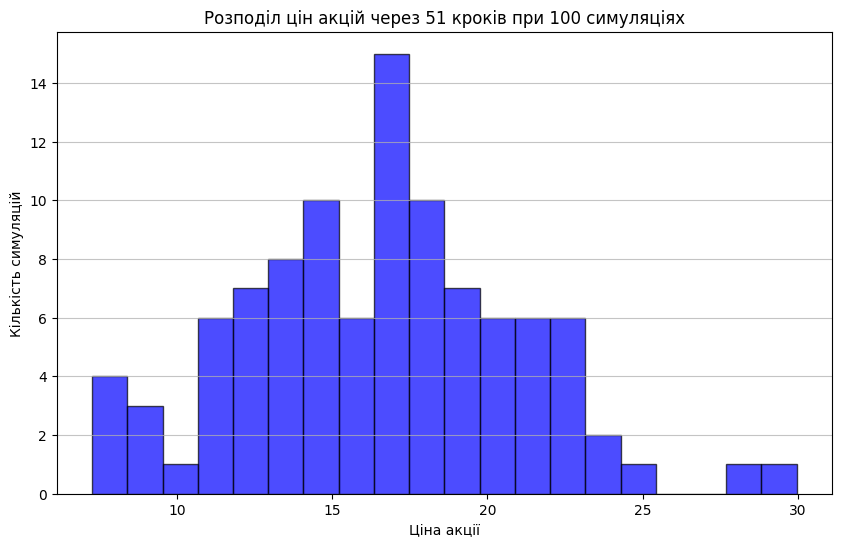

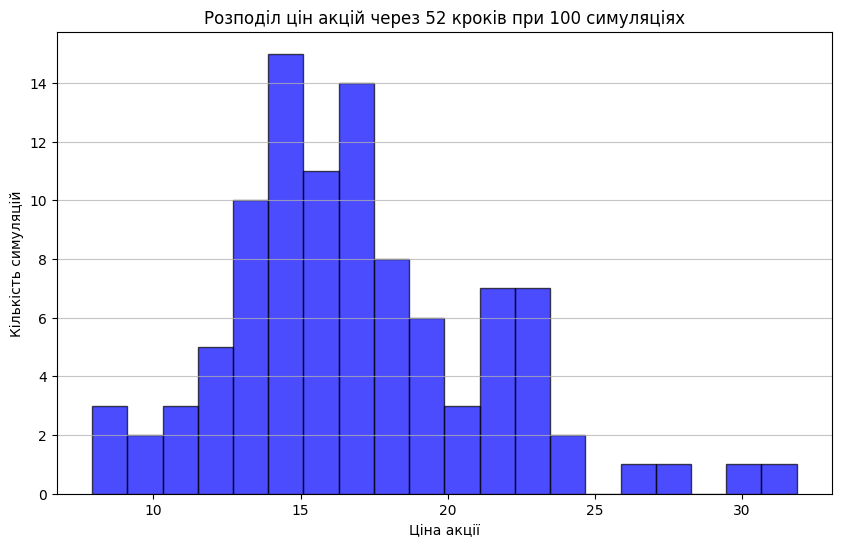

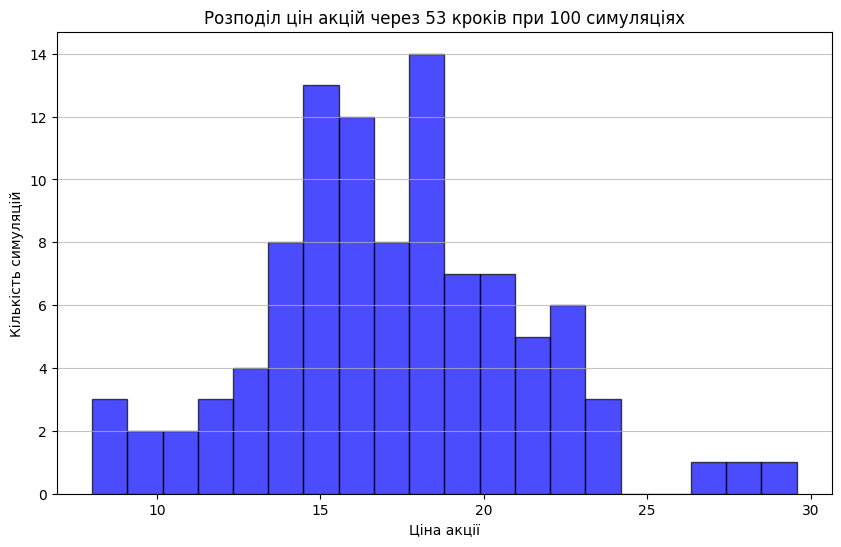

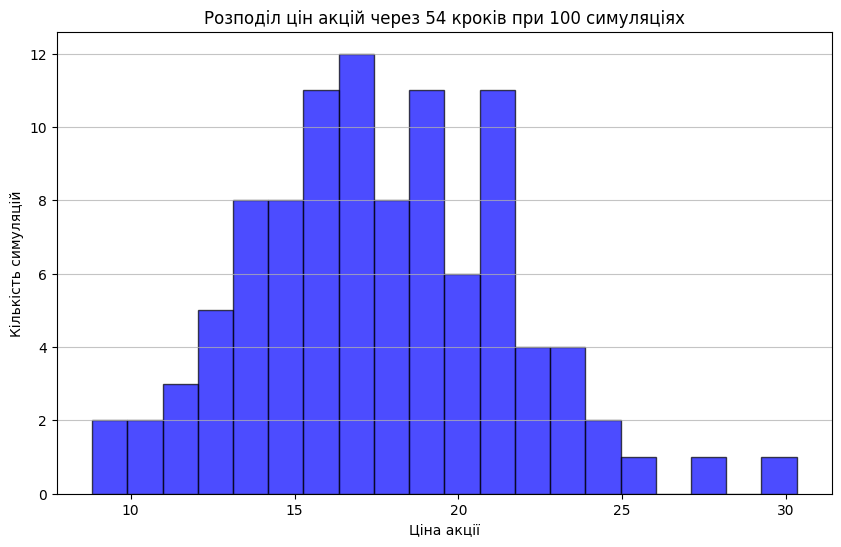

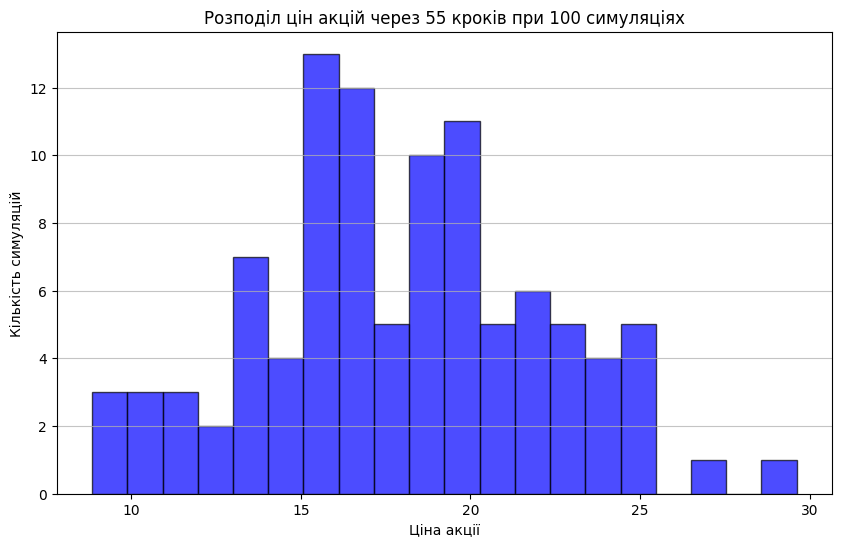

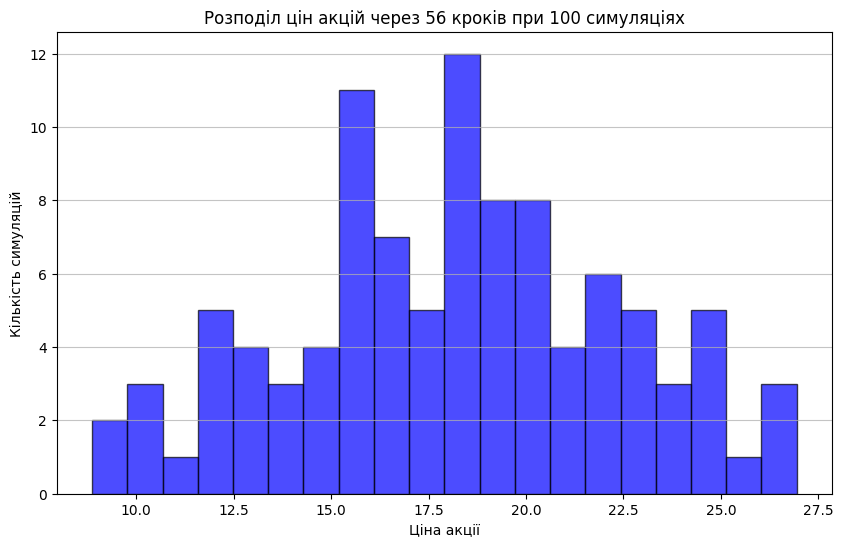

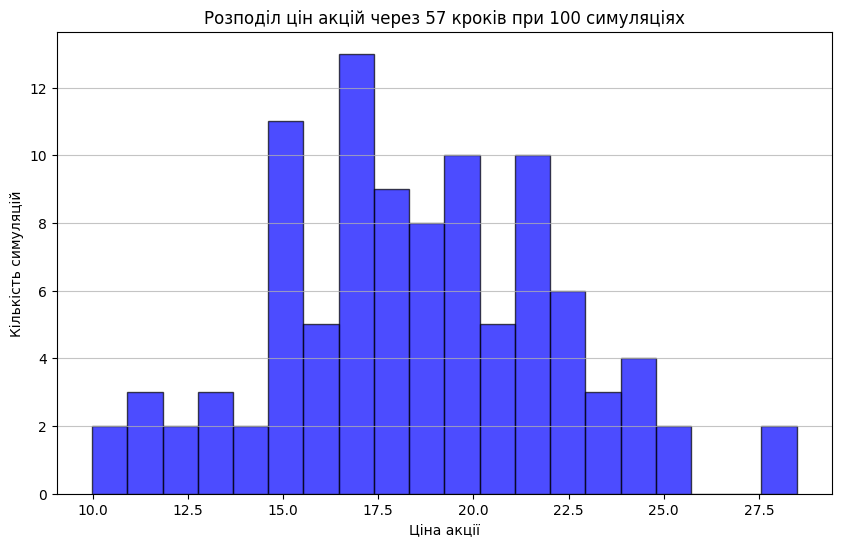

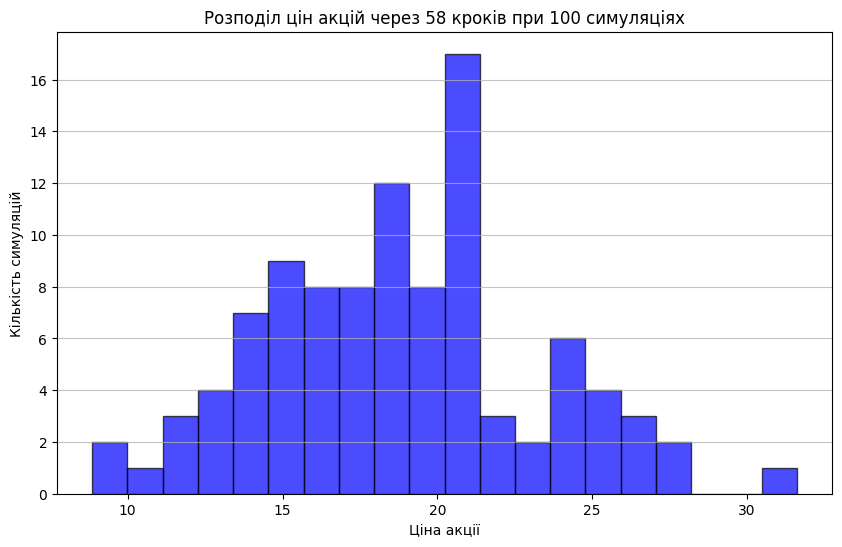

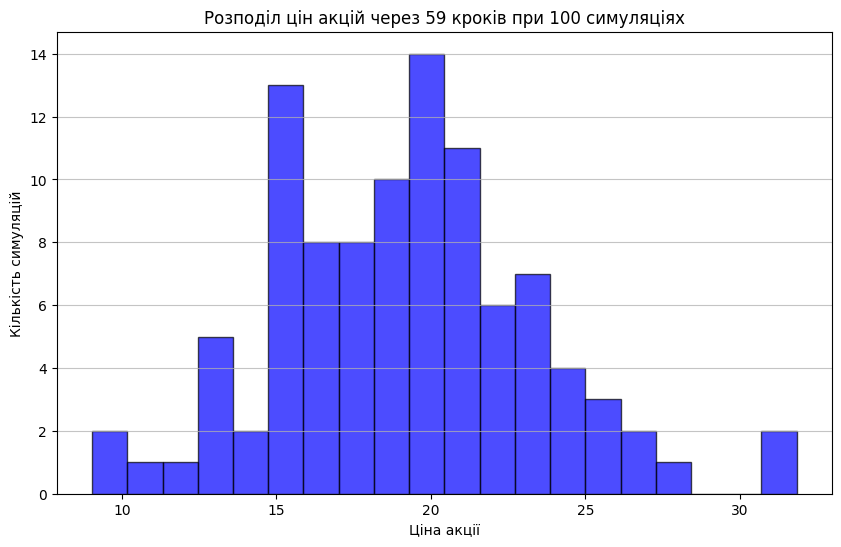

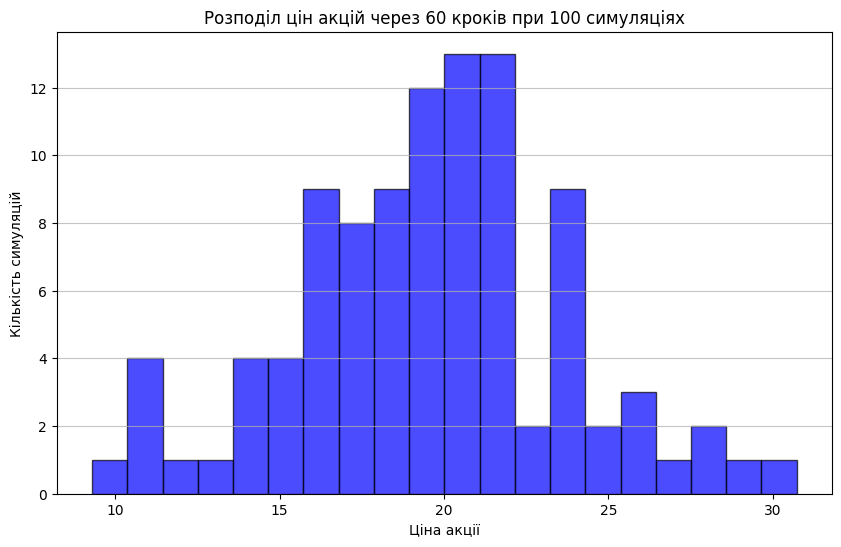

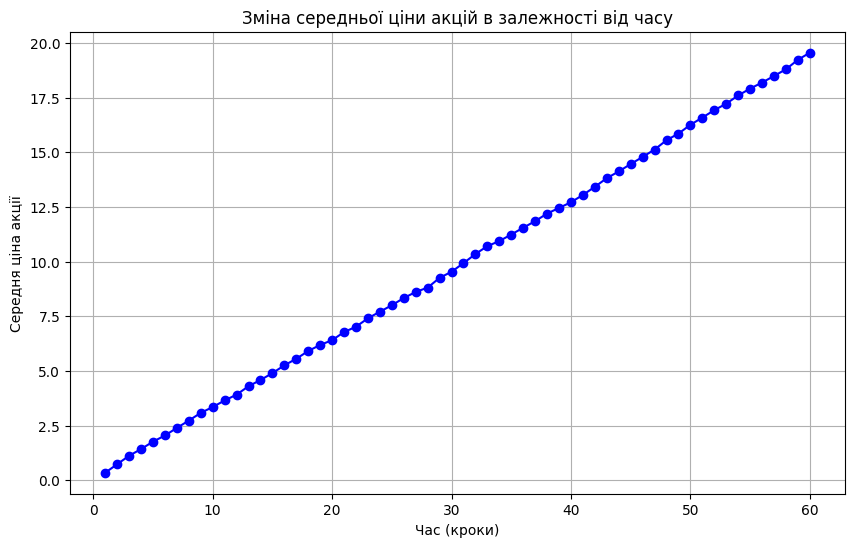

In [ ]:
time_intervals = range(1, 61)  # Визначення інтервалів часу від 1 до 60 з кроком 1
mean_prices = []  # Ініціалізація списку для зберігання середніх цін

# Проведення симуляції для кожного значення t і збереження середніх цін
for t in time_intervals:
    mean_price = simulate_n_times(100, t)
    mean_prices.append(mean_price)

# Вивід графіка середніх цін
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, mean_prices, marker='o', linestyle='-', color='blue')
plt.title("Зміна середньої ціни акцій в залежності від часу")
plt.xlabel("Час (кроки)")
plt.ylabel("Середня ціна акції")
plt.grid(True)
plt.show()

# Завдання 2

**Завдання 2**

Завантаж набір даних Product Advertising Data [посилання на диск](https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094). Набір даних складається із семи стовпчиків, що відображають витрати на рекламу на різних платформах — телебачення, білборди, Google Ads, соціальні медіа, інфлюенс-маркетинг та партнерський маркетинг.

Останній стовпчик, "Product_Sold", містить кількісну оцінку відповідної кількості проданих одиниць товару. Для кожної колонки порахуй середнє значення, дисперсію, стандартне відхилення, побудуй гістограму розподілу показника, перевір на нормальність розподілу та порахуй кореляцію з Product_Sold.

In [ ]:
import pandas as pd

# The URL for CSV export
url = 'https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/export?format=csv'

data = pd.read_csv(url)
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [ ]:
data_types = data.dtypes
missing_values = data.isnull().sum()
summary_statistics = data.describe()
data_types, missing_values, summary_statistics

(TV                      float64
 Billboards              float64
 Google_Ads              float64
 Social_Media            float64
 Influencer_Marketing    float64
 Affiliate_Marketing     float64
 Product_Sold            float64
 dtype: object,
 TV                      0
 Billboards              0
 Google_Ads              0
 Social_Media            0
 Influencer_Marketing    0
 Affiliate_Marketing     0
 Product_Sold            0
 dtype: int64,
                TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
 count  300.000000  300.000000  300.000000    300.000000            300.000000   
 mean   517.431000  502.644933  512.444133    489.800100            465.732567   
 std    288.114792  275.842369  285.422376    273.883915            288.314080   
 min      1.040000    3.630000   14.860000     11.690000              0.770000   
 25%    273.090000  277.912500  250.530000    265.612500            214.480000   
 50%    513.970000  533.020000  528.965000    486.385000 

In [ ]:
# Convert 'object' type columns to numeric
columns_to_convert = ['TV', 'Billboards', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check if conversion was successful
conversion_check = data.dtypes

# Calculate descriptive statistics for each column
# Mean, Variance, and Standard Deviation
descriptive_stats = data.describe().loc[['mean', 'std']]
descriptive_stats.loc['variance'] = data.var()

print("Conversion check results:")
print(conversion_check)
print("Mean, Variance, and Standard Deviation:")
descriptive_stats

Conversion check results:
TV                      float64
Billboards              float64
Google_Ads              float64
Social_Media            float64
Influencer_Marketing    float64
Affiliate_Marketing     float64
Product_Sold            float64
dtype: object
Mean, Variance, and Standard Deviation:


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7.031523e+03
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1.703615e+03
variance,83010.133644,76089.012737,81465.932638,75012.398925,83125.008455,77259.236607,2.902304e+06


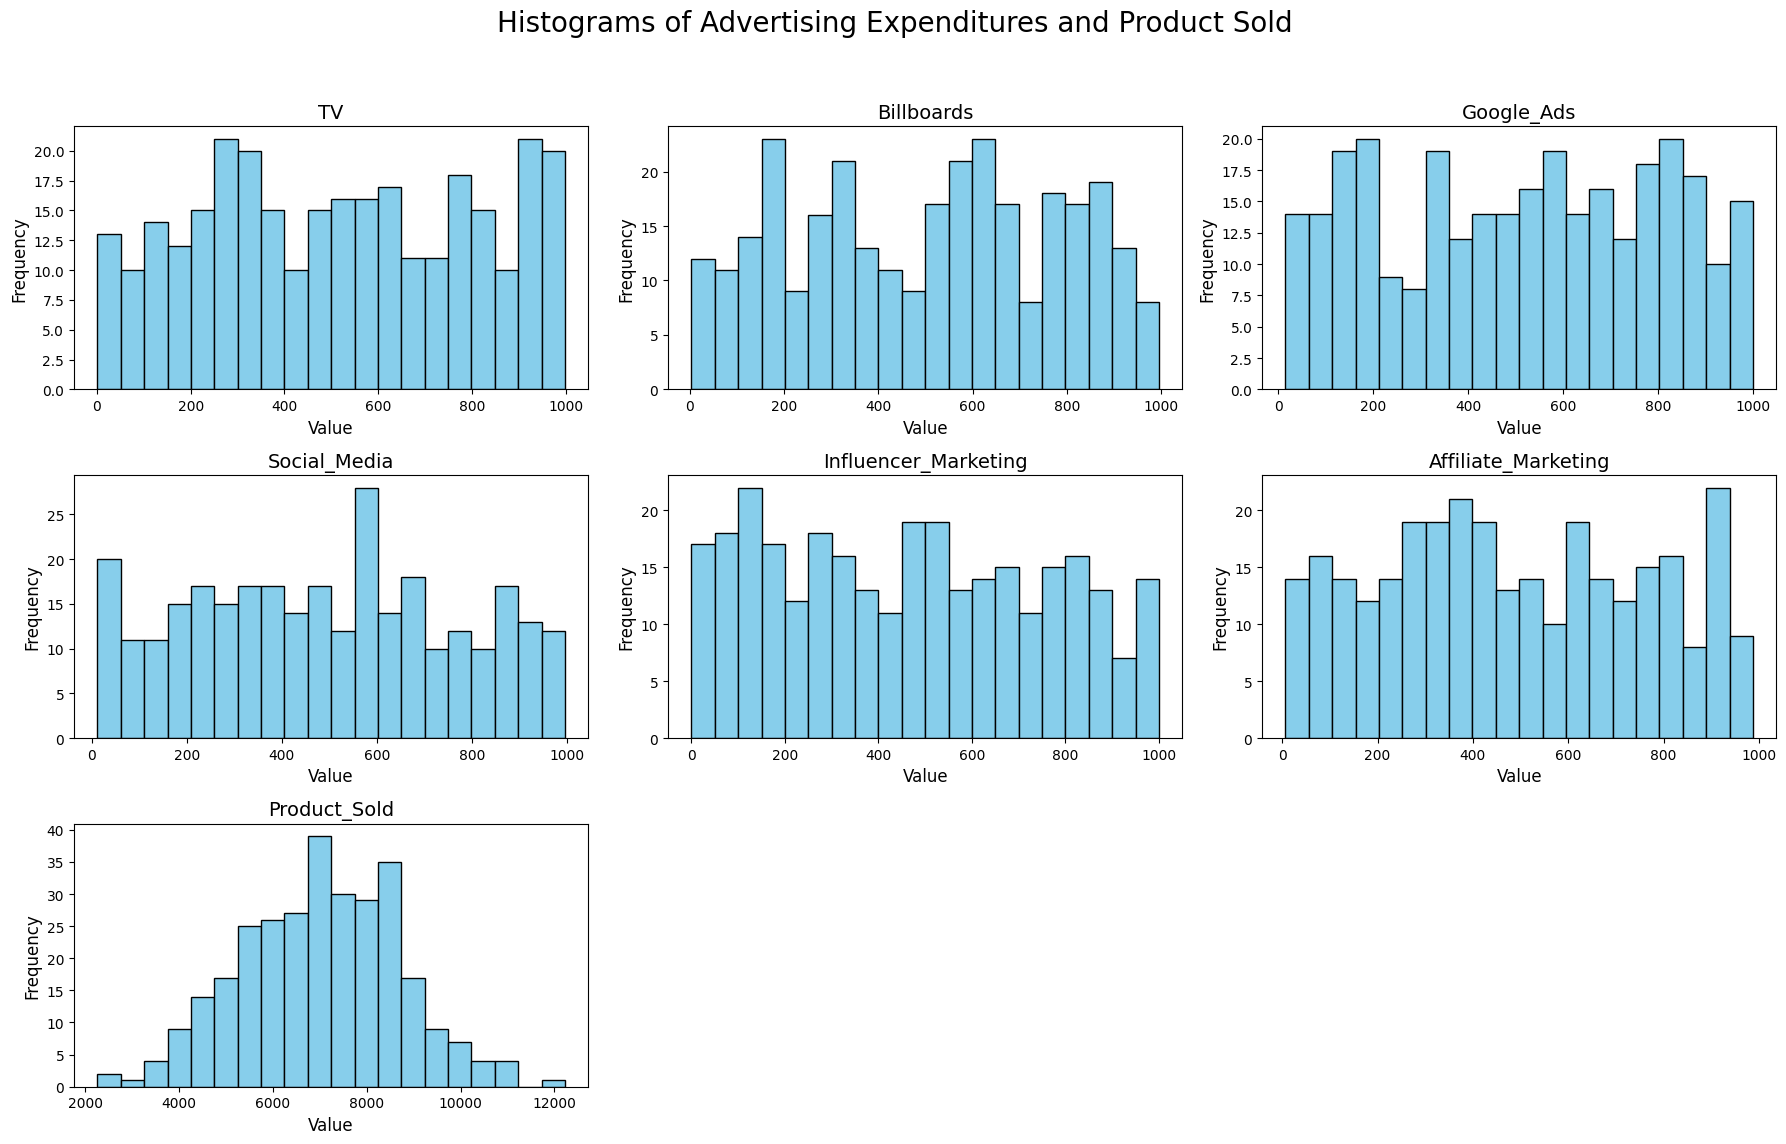

In [ ]:
import matplotlib.pyplot as plt

# Define the number of bins for histogram
bins = 20

# Setup the matplotlib figure and axes, organized in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Histograms of Advertising Expenditures and Product Sold', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(data.columns):
    axes[i].hist(data[col].dropna(), bins=bins, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('Value', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality for each column
normality_tests = {}
for col in data.columns:
    stat, p = shapiro(data[col].dropna())
    normality_tests[col] = {'Statistic': stat, 'p-value': p}

normality_tests_results = pd.DataFrame(normality_tests).T
normality_tests_results

,Statistic,p-value
TV,0.954856,5.376833e-08
Billboards,0.957601,1.194167e-07
Google_Ads,0.952348,2.658201e-08
Social_Media,0.963565,7.531086e-07
Influencer_Marketing,0.953185,3.354194e-08
Affiliate_Marketing,0.957767,1.254641e-07
Product_Sold,0.996653,7.862805e-01


In [ ]:
# Calculate Pearson correlation coefficients between expenditures on each platform and the number of products sold
correlations = data.corr()['Product_Sold'].drop('Product_Sold')  # Drop the self-correlation of Product_Sold
correlations

TV                      0.374228
Billboards              0.480593
Google_Ads              0.203678
Social_Media            0.401088
Influencer_Marketing    0.140844
Affiliate_Marketing     0.611603
Name: Product_Sold, dtype: float64

**Партнерський маркетинг** показує найсильнішу позитивну кореляцію з продажами продукції **(0.61)**, що свідчить про те, що збільшення витрат на партнерський маркетинг пов'язане зі значним зростанням кількості проданих товарів.

**Білборди та соціальні медіа** також демонструють помірні позитивні кореляції (**0.48** та **0.39** відповідно), що вказує на відносини, де більші витрати на ці платформи можуть призвести до вищих продажів.

**Телебачення та Google Ads** показують слабші позитивні кореляції з продажами продукції (**0.37** та **0.20**), що свідчить про менш виражені, але все ж позитивні, відносини між витратами та продажами.

**Інфлюенс-маркетинг** має найслабшу позитивну кореляцію (**0.15**), що вказує на дуже слабке зв'язок між витратами на інфлюенс-маркетинг та результатами продажів.